In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

(4073, 4)


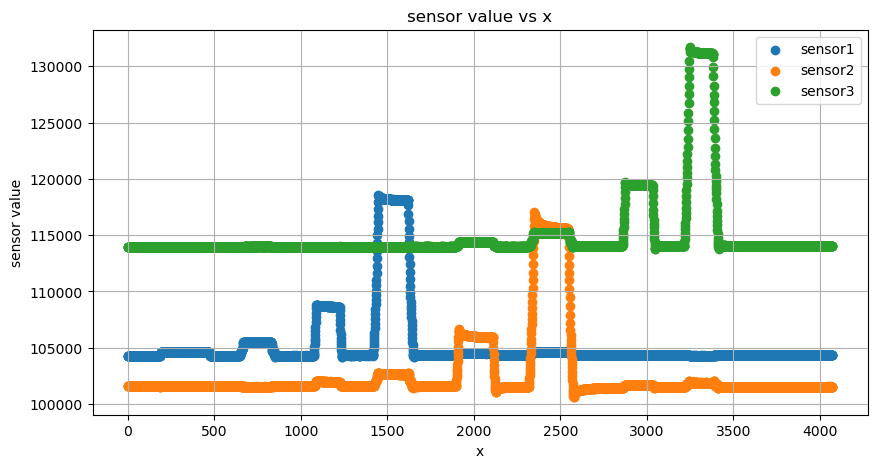

In [86]:
df_t0 = pd.read_csv('../tip1\Cali.csv')
# df_t0 = pd.read_csv('../tip1\zv1_zd5_t8_20230622_181736.csv')

print(df_t0.shape)

# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0.index, df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0.index, df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0.index, df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0.index, df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

In [87]:
# Minus the offset for first 4 collumns based on the average reading of the first 100 rows
print(df_t0['Sensor_0'].iloc[:100].mean())
print(df_t0['Sensor_1'].iloc[:100].mean())
print(df_t0['Sensor_2'].iloc[:100].mean())
print(df_t0['Sensor_3'].iloc[:100].mean())

# Print the max value of each sensor
print(df_t0['Sensor_0'].max())
print(df_t0['Sensor_1'].max())
print(df_t0['Sensor_2'].max())
print(df_t0['Sensor_3'].max())

mean = [df_t0['Sensor_0'].iloc[:100].mean(), df_t0['Sensor_1'].iloc[:100].mean(), df_t0['Sensor_2'].iloc[:100].mean(), df_t0['Sensor_3'].iloc[:100].mean()]
max = [df_t0['Sensor_0'].max(), df_t0['Sensor_1'].max(), df_t0['Sensor_2'].max(), df_t0['Sensor_3'].max()]

df_t0['Sensor_0'] = df_t0['Sensor_0'] - mean[0]
df_t0['Sensor_1'] = df_t0['Sensor_1'] - mean[1]
df_t0['Sensor_2'] = df_t0['Sensor_2'] - mean[2]
df_t0['Sensor_3'] = df_t0['Sensor_3'] - mean[3]

# Calibrate the sensor reading by devided the max value of each sensor
df_t0['Sensor_0'] = df_t0['Sensor_0'] / (max[0] - mean[0])
df_t0['Sensor_1'] = df_t0['Sensor_1'] / (max[1] - mean[1])
df_t0['Sensor_2'] = df_t0['Sensor_2'] / (max[2] - mean[2])
df_t0['Sensor_3'] = df_t0['Sensor_3'] / (max[3] - mean[3])


101267.2375
104259.485
101574.9875
113959.65
112952.75
118557.5
117048.5
131700.0


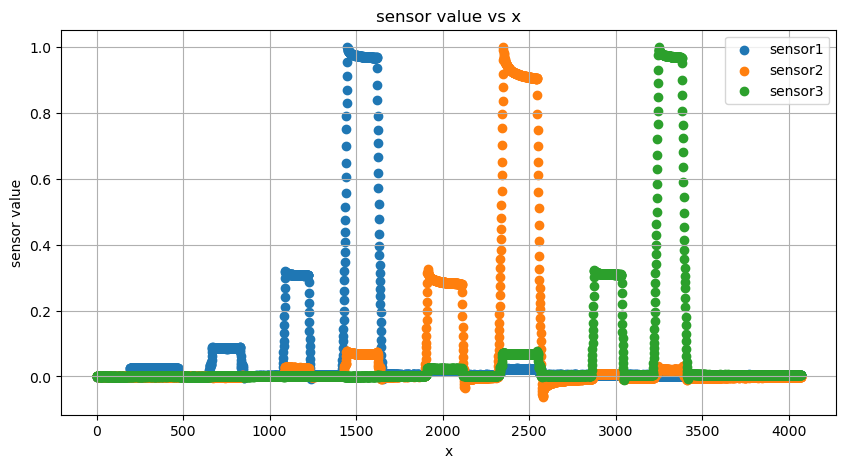

In [88]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0.index, df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0.index, df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0.index, df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0.index, df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

## X-axis

### Preparation

(16917, 7)


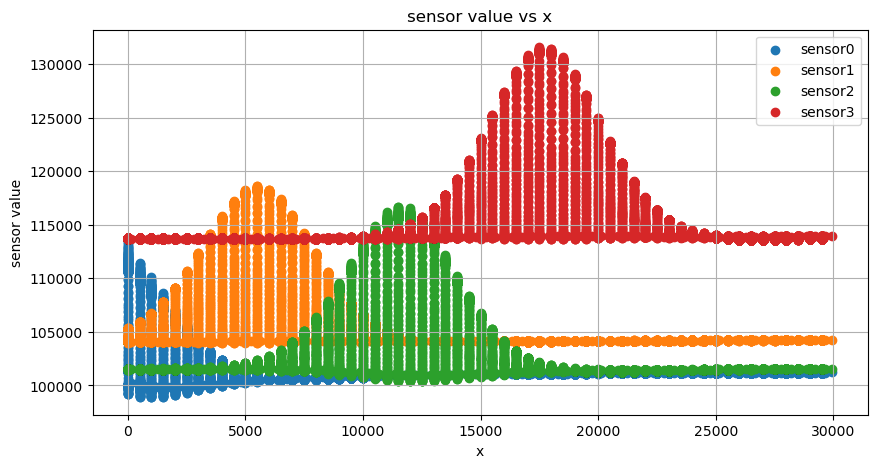

In [103]:
df_t0 = pd.read_csv('../tip1\\test_full_20230706_175400.csv')
# df_t0 = pd.read_csv('../tip1\zv1_zd5_t8_20230622_181736.csv')

print(df_t0.shape)

# Plot the data
plt.figure(figsize=(10,5))
plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0['x'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['x'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['x'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

In [90]:
# # Minus the offset for first 4 collumns based on the average reading of the first 100 rows
# print(df_t0['Sensor_0'].iloc[:100].mean())
# print(df_t0['Sensor_1'].iloc[:100].mean())
# print(df_t0['Sensor_2'].iloc[:100].mean())
# print(df_t0['Sensor_3'].iloc[:100].mean())


# df_t0['Sensor_0'] = df_t0['Sensor_0'] - df_t0['Sensor_0'].iloc[:100].mean()
# df_t0['Sensor_1'] = df_t0['Sensor_1'] - df_t0['Sensor_1'].iloc[:100].mean()
# df_t0['Sensor_2'] = df_t0['Sensor_2'] - df_t0['Sensor_2'].iloc[:100].mean()
# df_t0['Sensor_3'] = df_t0['Sensor_3'] - df_t0['Sensor_3'].iloc[:100].mean()




In [104]:
df_t0['Sensor_0'] = df_t0['Sensor_0'] - mean[0]
df_t0['Sensor_1'] = df_t0['Sensor_1'] - mean[1]
df_t0['Sensor_2'] = df_t0['Sensor_2'] - mean[2]
df_t0['Sensor_3'] = df_t0['Sensor_3'] - mean[3]


# Calibrate the sensor reading by devided the max value of each sensor
df_t0['Sensor_0'] = df_t0['Sensor_0'] / (max[0] - mean[0])
df_t0['Sensor_1'] = df_t0['Sensor_1'] / (max[1] - mean[1])
df_t0['Sensor_2'] = df_t0['Sensor_2'] / (max[2] - mean[2])
df_t0['Sensor_3'] = df_t0['Sensor_3'] / (max[3] - mean[3])

In [105]:
# delete the row with x != multiple of 1000
# df_t0 = df_t0[df_t0['x'] % 1000 == 0]

# Only remain the data with x is between 5000 and 11000
df_t0 = df_t0[df_t0['x'] >= 6000]
df_t0 = df_t0[df_t0['x'] <= 18000]

# devide the 'x' by 1000
df_t0['x'] = df_t0['x'] / 1000

# # Remain the data, which z is the maximum value for fixed x
# df_t0 = df_t0.groupby('x').max()

# Remain the data, which z greater than 2000
df_t0 = df_t0[df_t0['z'] > 1000]

# z devided by 480 steps/mm
# df_t0['z'] = df_t0['z']/480



In [106]:
df_t0

,Sensor_0,Sensor_1,Sensor_2,Sensor_3,x,z,time
3785,-0.065828,-0.009581,-0.002471,-0.013805,6.0,1002,215.585618
3786,-0.065914,-0.009214,-0.002229,-0.014115,6.0,1032,215.646904
3787,-0.066320,-0.009493,-0.002730,-0.014270,6.0,1056,215.703450
3788,-0.065293,-0.004632,-0.001599,-0.014270,6.0,1086,215.760154
3789,-0.066984,0.004162,-0.001679,-0.013875,6.0,1110,215.817548
...,...,...,...,...,...,...,...
10565,-0.015060,-0.008357,-0.019129,0.026457,18.0,1116,617.944046
10566,-0.014975,-0.008217,-0.020211,0.013464,18.0,1086,618.006182
10567,-0.014333,-0.008304,-0.019112,0.001048,18.0,1062,618.061660
10568,-0.015018,-0.008164,-0.018321,-0.006660,18.0,1032,618.121743


### Visualization

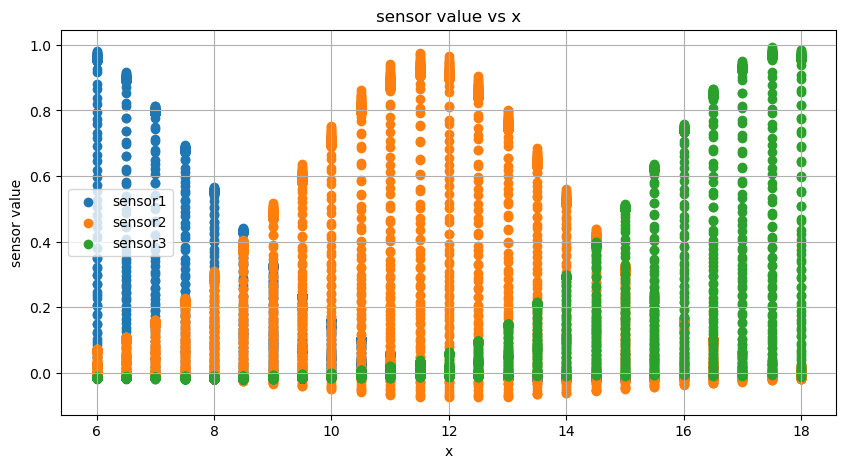

In [107]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0['x'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['x'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['x'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

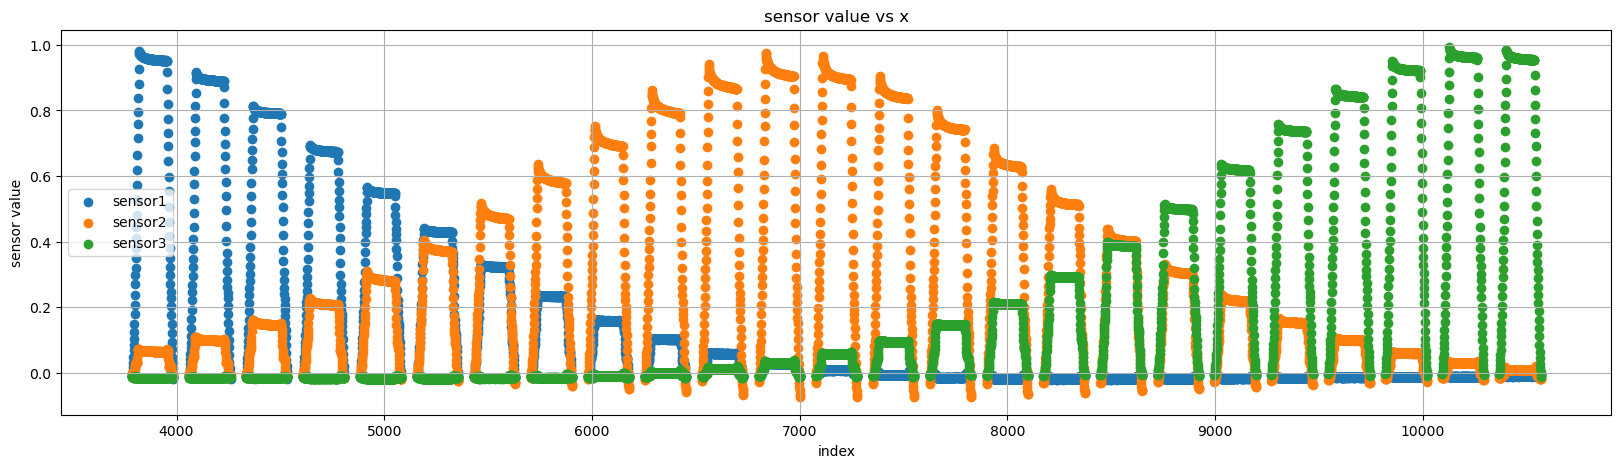

In [108]:
# Plot the data
plt.figure(figsize=(20,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0.index, df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0.index, df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0.index, df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('index')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

### Training

In [115]:
X = df_t0[[ 'Sensor_1','Sensor_2', 'Sensor_3']].iloc[:, :].values
y = df_t0['x'].values

In [116]:
y.shape

(5026,)

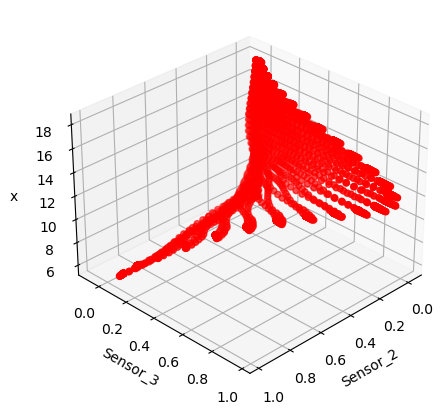

In [117]:
# plot the data in a 3d plot

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('x')

# Change the angle of the plot
ax.view_init(azim=45)

plt.show()


In [118]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a pipeline for polynomial regression
model = make_pipeline(PolynomialFeatures(degree=7), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# # Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Calculate the mean squared error for training and test sets
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for training set: {mse_train}")
print(f"Mean squared error for test set: {mse_test}")


R-squared score: 0.9755870168857455
Mean squared error for training set: 0.3060388530859367
Mean squared error for test set: 0.32646729262848445


Text(0.5, 0, 'x')

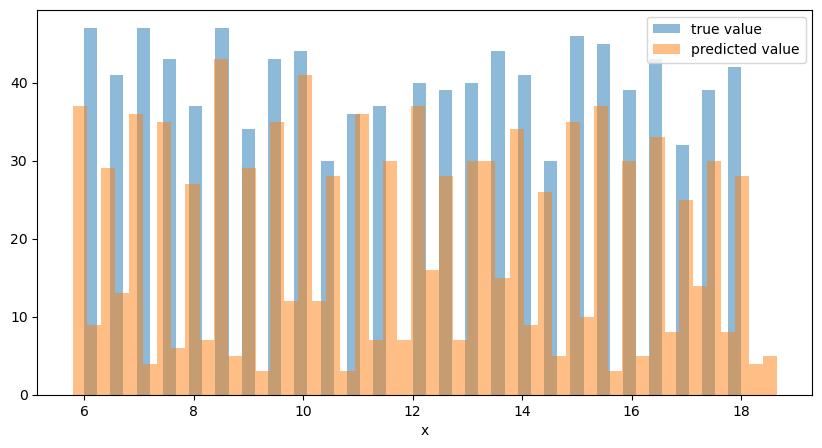

In [119]:
# plot the distribution of data
plt.figure(figsize=(10,5))
plt.hist(y_test, bins=50, alpha=0.5, label='true value')
plt.hist(y_pred, bins=50, alpha=0.5, label='predicted value')
plt.legend()
plt.xlabel('x')


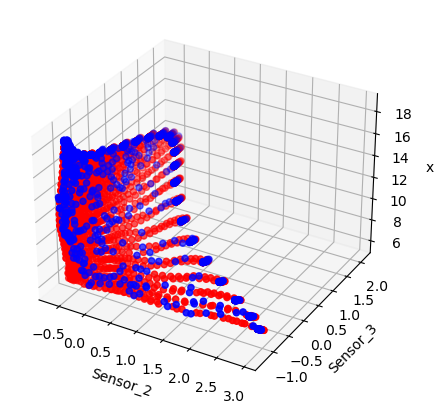

In [120]:
# Plot the results in 3d
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='b', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('x')
plt.show()





In [114]:
# Print the predicted values and the actual values one by one
for i in range(len(y_pred)):
    print(f"Predicted value: {y_pred[i]:.2f}, Actual value: {y_test[i]:.2f}")



TypeError: unsupported format string passed to numpy.ndarray.__format__

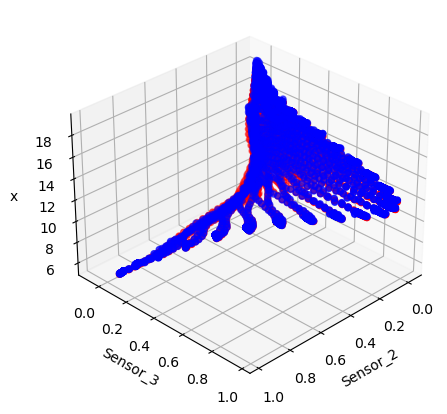

In [77]:
# Plot the results, the predicted values for all the data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.scatter(X[:, 0], X[:, 1], model.predict(scaler.transform(X)), c='b', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('x')

# Change the angle of the plot
ax.view_init(azim=45)
plt.show()


In [78]:
# Test the input, x = 3677.3125, 51.5725, 4088.3125	58.5725
new_input = [[3677.3125,51]]
new_input = scaler.transform(new_input)
new_output = model.predict(new_input)
print(f"Predicted output: {new_output}")

ValueError: X has 2 features, but StandardScaler is expecting 3 features as input.

In [79]:
# Show the regression coefficients
print(f"Regression coefficients: {model.named_steps['linearregression'].coef_}")

# Show the regression intercept
print(f"Regression intercept: {model.named_steps['linearregression'].intercept_}")

# Show the regressino formula, degree = 2
print(f"Regression formula: y = {model.named_steps['linearregression'].intercept_} + {model.named_steps['linearregression'].coef_[0]}*x1 + {model.named_steps['linearregression'].coef_[1]}*x2 + {model.named_steps['linearregression'].coef_[2]}*x3 + {model.named_steps['linearregression'].coef_[3]}*x1^2 + {model.named_steps['linearregression'].coef_[4]}*x1*x2 + {model.named_steps['linearregression'].coef_[5]}*x1*x3 + {model.named_steps['linearregression'].coef_[6]}*x2^2 + {model.named_steps['linearregression'].coef_[7]}*x2*x3 + {model.named_steps['linearregression'].coef_[8]}*x3^2")

Regression coefficients: [ 3.77972594e-02  2.13322313e+04  5.00374556e+03  2.65881524e+04
  4.61414405e+04  2.12918724e+04  1.44277268e+05 -5.13867619e+02
  2.25304159e+04  7.10345948e+04  4.16440250e+04  2.82175524e+04
  2.79780253e+05 -5.06739110e+03  9.51499794e+04  3.60323190e+05
 -1.84423139e+03 -3.64770574e+03  3.72442077e+04  8.25403393e+04
  1.26372996e+04  9.19490706e+03  2.22835158e+05 -1.26843151e+04
  1.26771598e+05  6.40357452e+05 -6.52046399e+03 -2.29477514e+04
  1.52253990e+05  3.98473270e+05 -1.73737453e+02 -5.72983724e+03
 -7.07058268e+03  2.73023319e+04  3.72844396e+04 -5.82786303e+01
 -3.13097711e+03  5.69382524e+04 -9.66651483e+03  4.60651932e+04
  4.46522761e+05 -6.25953952e+03 -4.43858581e+04  1.98320057e+05
  6.57684808e+05 -6.33083596e+02 -1.99133573e+04 -3.33583472e+04
  1.01996523e+05  1.70624432e+05 -5.55854668e+01 -6.80956547e+02
 -4.85648241e+03 -3.34813320e+03  8.40117166e+03  2.36674987e+03
 -6.43900601e-01 -4.84201975e+01 -1.40480890e+02 -3.67948206e+02


## MLP

In [80]:
from sklearn.neural_network import MLPRegressor

# Using MLP Regressor
# Create a pipeline for polynomial regression
model = make_pipeline(PolynomialFeatures(degree=7), MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# # Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Calculate the mean squared error for training and test sets
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for training set: {mse_train}")
print(f"Mean squared error for test set: {mse_test}")

R-squared score: 0.9804883003542569
Mean squared error for training set: 0.24281529442961916
Mean squared error for test set: 0.2609239406800126


Text(0.5, 0, 'x')

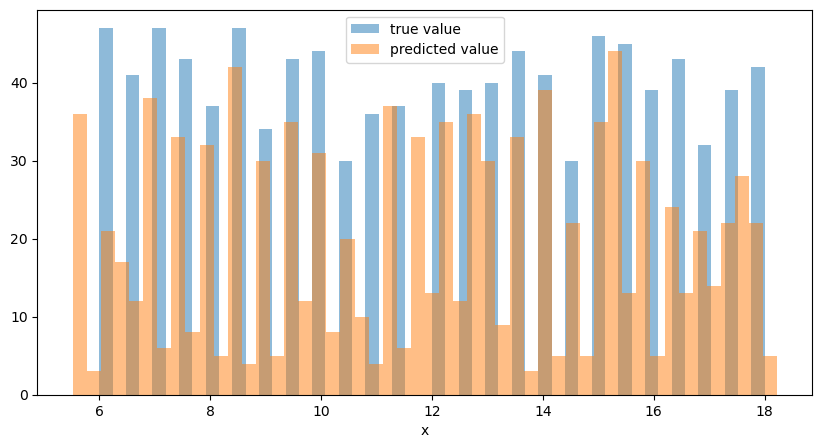

In [81]:
# plot the distribution of data
plt.figure(figsize=(10,5))
plt.hist(y_test, bins=50, alpha=0.5, label='true value')
plt.hist(y_pred, bins=50, alpha=0.5, label='predicted value')
plt.legend()
plt.xlabel('x')


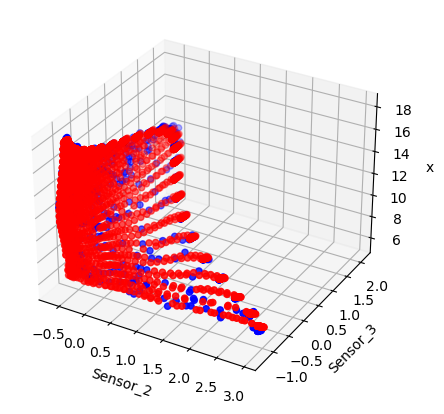

In [82]:
# Plot the results in 3d
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='r', marker='o')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='b', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('x')
plt.show()



In [83]:
# Print the predicted values and the actual values one by one
for i in range(len(y_pred)):
    print(f"Predicted value: {y_pred[i]:.2f}, Actual value: {y_test[i]:.2f}")



Predicted value: 7.94, Actual value: 8.00
Predicted value: 17.73, Actual value: 18.00
Predicted value: 12.28, Actual value: 12.00
Predicted value: 11.83, Actual value: 11.50
Predicted value: 7.94, Actual value: 8.00
Predicted value: 6.49, Actual value: 6.50
Predicted value: 13.98, Actual value: 14.00
Predicted value: 5.60, Actual value: 6.00
Predicted value: 6.36, Actual value: 6.50
Predicted value: 8.98, Actual value: 9.00
Predicted value: 12.24, Actual value: 13.00
Predicted value: 15.81, Actual value: 16.00
Predicted value: 11.97, Actual value: 18.00
Predicted value: 15.35, Actual value: 15.50
Predicted value: 6.26, Actual value: 6.50
Predicted value: 13.48, Actual value: 13.50
Predicted value: 6.90, Actual value: 7.00
Predicted value: 11.24, Actual value: 11.00
Predicted value: 13.99, Actual value: 14.00
Predicted value: 9.48, Actual value: 9.50
Predicted value: 17.11, Actual value: 17.00
Predicted value: 12.27, Actual value: 12.00
Predicted value: 12.78, Actual value: 13.00
Predic

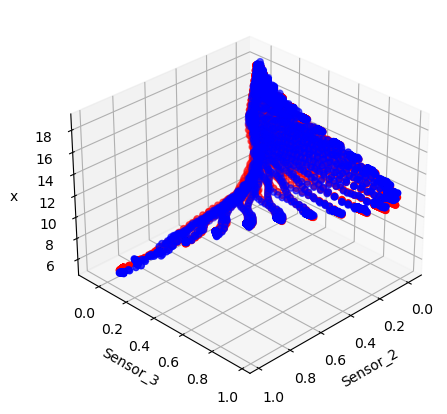

In [84]:
# Plot the results, the predicted values for all the data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.scatter(X[:, 0], X[:, 1], model.predict(scaler.transform(X)), c='b', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('x')

# Change the angle of the plot
ax.view_init(azim=45)
plt.show()


In [ ]:
# Multiple output regression
# Create a pipeline for polynomial regression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())



## Z-axis

### Preparation

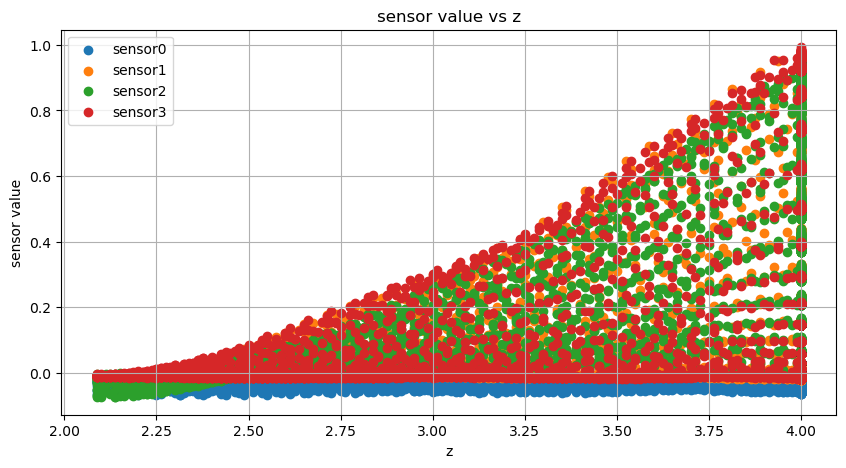

In [50]:
# z devided by 480 steps/mm
df_t0['z'] = df_t0['z']/480

# Plot the data
plt.figure(figsize=(10,5))
plt.scatter(df_t0['z'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0['z'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['z'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['z'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('z')
plt.ylabel('sensor value')
plt.title('sensor value vs z')
plt.grid(True)
plt.show()

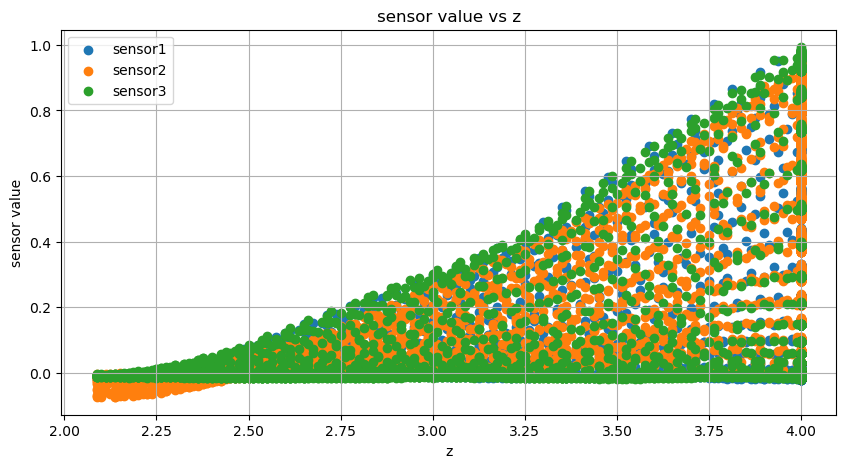

In [53]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0['z'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['z'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['z'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('z')
plt.ylabel('sensor value')
plt.title('sensor value vs z')
plt.grid(True)
plt.show()

### Training

In [54]:
X = df_t0[[ 'Sensor_1','Sensor_2', 'Sensor_3']].iloc[:, :].values
y = df_t0['z'].values

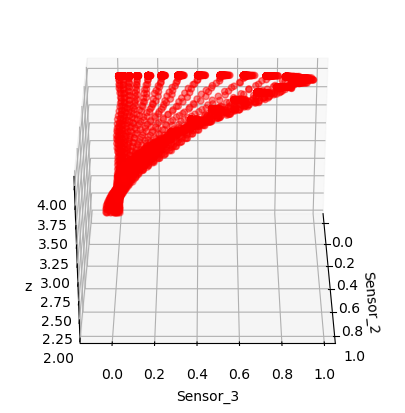

In [55]:
# plot the data in a 3d plot

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('z')

# Change the angle of the plot
ax.view_init(azim=0)

plt.show()

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a pipeline for polynomial regression
model_z = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
model_z.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model_z.predict(X_test)

# # Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Calculate the mean squared error for training and test sets
mse_train = mean_squared_error(y_train, model_z.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for training set: {mse_train}")
print(f"Mean squared error for test set: {mse_test}")


R-squared score: 0.9939787063225863
Mean squared error for training set: 0.0018778461220814423
Mean squared error for test set: 0.0017907832181145193


In [57]:
# Print the predicted values and the actual values one by one
for i in range(len(y_pred)):
    print(f"Predicted value: {y_pred[i]:.2f}, Actual value: {y_test[i]:.2f}")



Predicted value: 4.00, Actual value: 4.00
Predicted value: 3.95, Actual value: 4.00
Predicted value: 4.00, Actual value: 4.00
Predicted value: 3.99, Actual value: 4.00
Predicted value: 2.50, Actual value: 2.54
Predicted value: 4.00, Actual value: 4.00
Predicted value: 3.97, Actual value: 4.00
Predicted value: 3.98, Actual value: 4.00
Predicted value: 4.01, Actual value: 4.00
Predicted value: 3.99, Actual value: 4.00
Predicted value: 2.58, Actual value: 2.60
Predicted value: 4.02, Actual value: 4.00
Predicted value: 2.31, Actual value: 2.15
Predicted value: 4.00, Actual value: 4.00
Predicted value: 4.01, Actual value: 4.00
Predicted value: 4.00, Actual value: 4.00
Predicted value: 4.01, Actual value: 4.00
Predicted value: 4.00, Actual value: 4.00
Predicted value: 4.01, Actual value: 4.00
Predicted value: 3.99, Actual value: 4.00
Predicted value: 3.65, Actual value: 3.61
Predicted value: 3.99, Actual value: 4.00
Predicted value: 3.80, Actual value: 3.70
Predicted value: 3.98, Actual valu

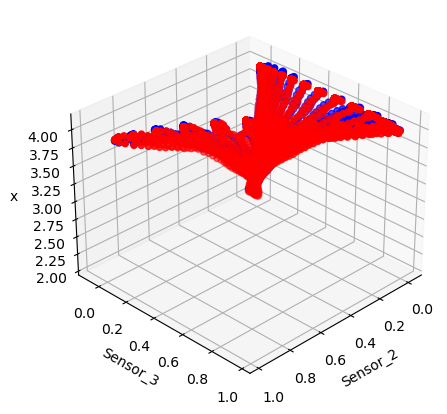

In [58]:
# Plot the results, the predicted values for all the data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.scatter(X[:, 0], X[:, 1], model_z.predict(scaler.transform(X)), c='b', marker='o')
ax.set_xlabel('Sensor_2')
ax.set_ylabel('Sensor_3')
ax.set_zlabel('x')

# Change the angle of the plot
ax.view_init(azim=45)
plt.show()


In [24]:
# Test the input, x = 3677.3125, 51.5725, 4088.3125	58.5725
new_input = [[11800.5625,106.8225]]
new_input = scaler.transform(new_input)
new_output = model_z.predict(new_input)
print(f"Predicted output: {new_output}")

Predicted output: [4.98028335]


## Model Combination

In [59]:
# Combine the models, make predictions for all the data in the dataframe
df_t0['z_pred'] = model_z.predict(scaler.transform(df_t0[['Sensor_1', 'Sensor_2', 'Sensor_3']]))
df_t0['x_pred'] = model.predict(scaler.transform(df_t0[['Sensor_1', 'Sensor_2', 'Sensor_3']]))

c:\Users\59784\.conda\envs\data\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
c:\Users\59784\.conda\envs\data\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


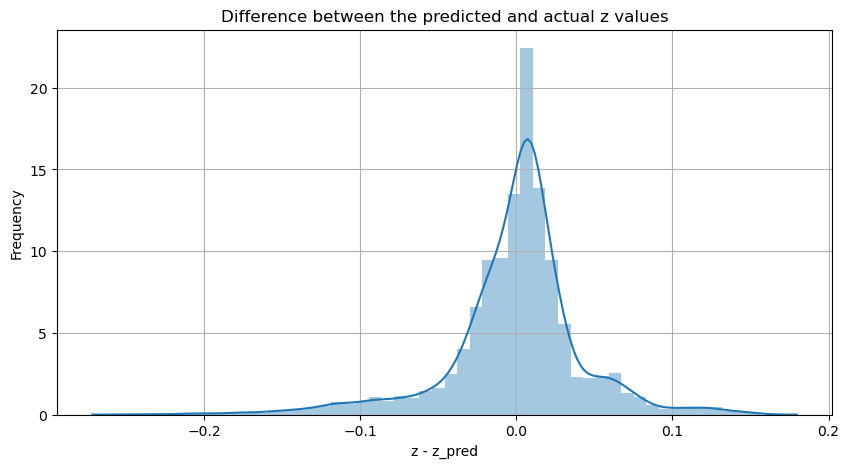

In [60]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t0['z'] - df_t0['z_pred'], bins=50)
plt.xlabel('z - z_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual z values')
plt.grid(True)
plt.show()



c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


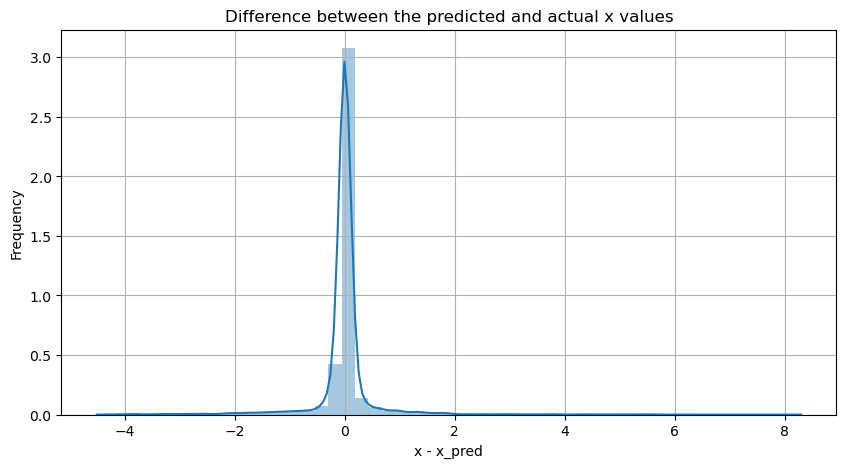

In [61]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t0['x'] - df_t0['x_pred'], bins=50)
plt.xlabel('x - x_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual x values')
plt.grid(True)
plt.show()


### Additional Plots

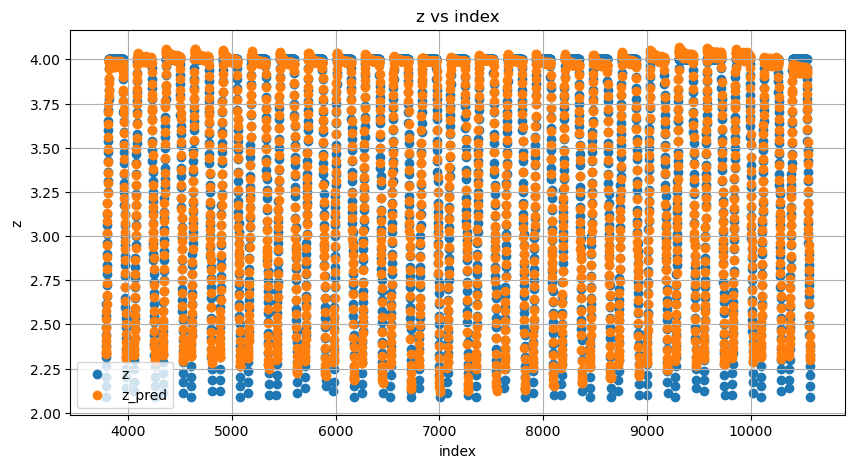

In [63]:
# Plot the results in 2d z and vs index
plt.figure(figsize=(10,5))
plt.scatter(df_t0.index, df_t0['z'], label='z')
plt.scatter(df_t0.index, df_t0['z_pred'], label='z_pred')
plt.legend()
plt.xlabel('index')
plt.ylabel('z')
plt.title('z vs index')
plt.grid(True)
plt.show()


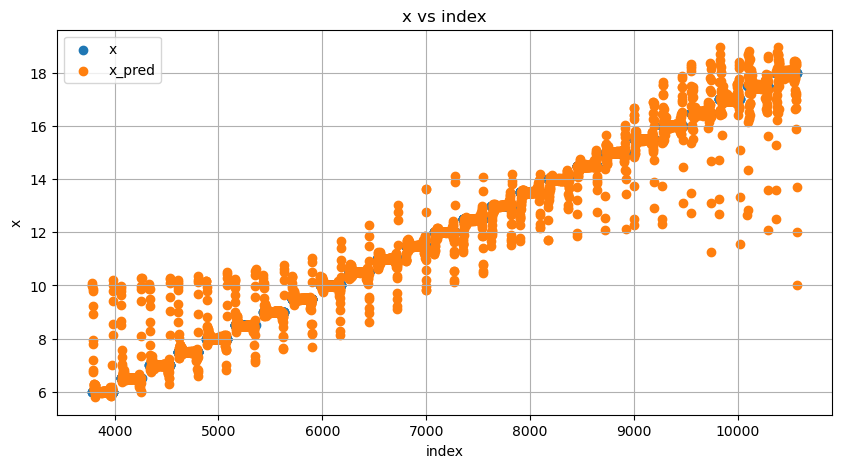

In [64]:
# Plot the results in 2d x and vs index
plt.figure(figsize=(10,5))
plt.scatter(df_t0.index, df_t0['x'], label='x')
plt.scatter(df_t0.index, df_t0['x_pred'], label='x_pred')
plt.legend()
plt.xlabel('index')
plt.ylabel('x')
plt.title('x vs index')
plt.grid(True)
plt.show()


## Model performance - Out-of-sample

(7122, 7)


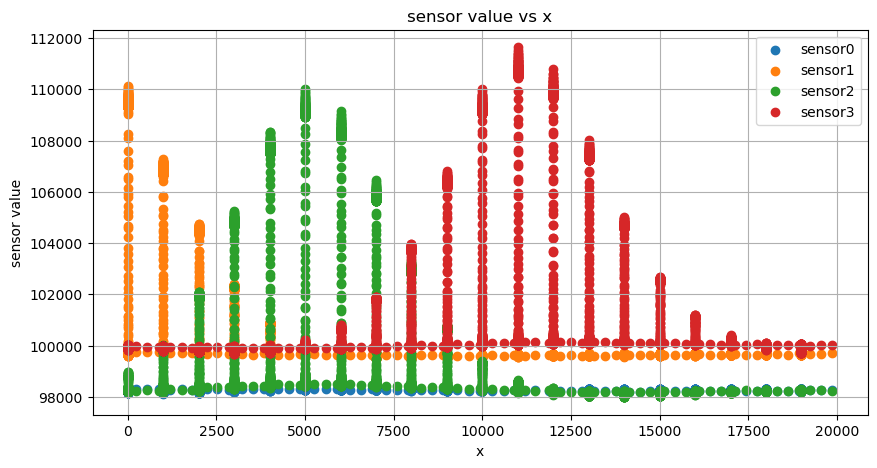

In [30]:
# Test the out-of-sample data
df_t1 = pd.read_csv('../tip1/zv1_zd5_t8_20230622_181736.csv')
# df_t1 = pd.read_csv('../tip1\zv1_zd6_t0_20230622_180037.csv')


print(df_t1.shape)

# Plot the data
plt.figure(figsize=(10,5))
plt.scatter(df_t1['x'], df_t1['Sensor_0'], label='sensor0')
plt.scatter(df_t1['x'], df_t1['Sensor_1'], label='sensor1')
plt.scatter(df_t1['x'], df_t1['Sensor_2'], label='sensor2')
plt.scatter(df_t1['x'], df_t1['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()
# Same preprocessing as for the training data


In [31]:
# Minus the offset for first 4 collumns based on the average reading of the first 100 rows
print(df_t1['Sensor_0'].iloc[:100].mean())
print(df_t1['Sensor_1'].iloc[:100].mean())
print(df_t1['Sensor_2'].iloc[:100].mean())
print(df_t1['Sensor_3'].iloc[:100].mean())


df_t1['Sensor_0'] = df_t1['Sensor_0'] - df_t1['Sensor_0'].iloc[:100].mean()
df_t1['Sensor_1'] = df_t1['Sensor_1'] - df_t1['Sensor_1'].iloc[:100].mean()
df_t1['Sensor_2'] = df_t1['Sensor_2'] - df_t1['Sensor_2'].iloc[:100].mean()
df_t1['Sensor_3'] = df_t1['Sensor_3'] - df_t1['Sensor_3'].iloc[:100].mean()

# delete the row with x != multiple of 1000
df_t1 = df_t1[df_t1['x'] % 1000 == 0]

# Only remain the data with x is between 5000 and 11000
df_t1 = df_t1[df_t1['x'] >= 5000]
df_t1 = df_t1[df_t1['x'] <= 11000]

# devide the 'x' by 1000
df_t1['x'] = df_t1['x'] / 1000

# # Remain the data, which z is the maximum value for fixed x
# df_t0 = df_t0.groupby('x').max()

# Remain the data, which z greater than 2000
df_t1 = df_t1[df_t1['z'] > 2000]

df_t1['z'] = df_t1['z']/480




98306.5825
99661.21
98248.3425
99981.7125


### Visualization

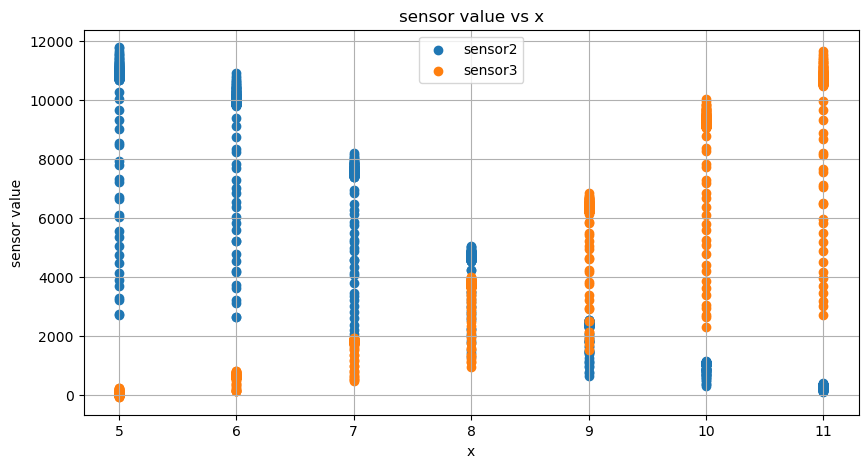

In [32]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
# plt.scatter(df_t0['x'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t1['x'], df_t1['Sensor_2'], label='sensor2')
plt.scatter(df_t1['x'], df_t1['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

### Test

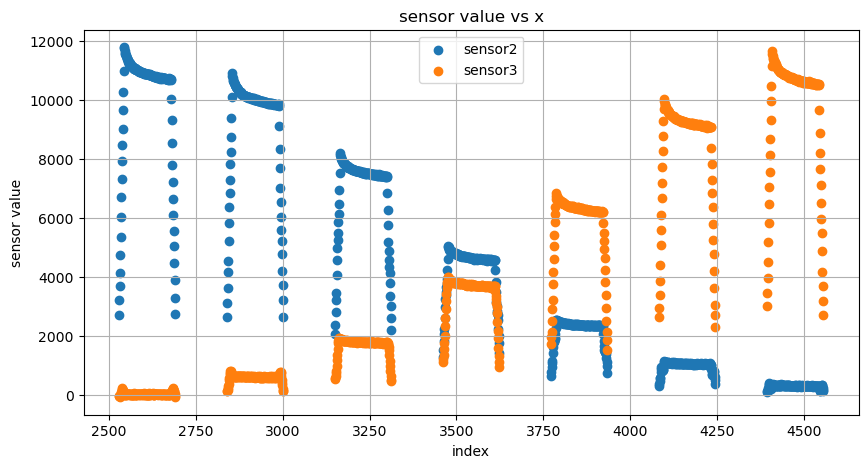

In [33]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
# plt.scatter(df_t0.index, df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t1.index, df_t1['Sensor_2'], label='sensor2')
plt.scatter(df_t1.index, df_t1['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('index')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

In [34]:
X_out = df_t1[[ 'Sensor_2', 'Sensor_3']].iloc[:, :].values
y_out_x = df_t1['x'].values
y_out_z = df_t1['z'].values


In [35]:
# test the model
y_out_pred_x = model.predict(scaler.transform(X_out))
y_out_pred_z = model_z.predict(scaler.transform(X_out))

# Calculate the mean squared error for training and test sets
mse_test = mean_squared_error(y_out_x, y_out_pred_x)
mse_test_z = mean_squared_error(y_out_z, y_out_pred_z)
print(f"Mean squared error for test set (x): {mse_test}")
print(f"Mean squared error for test set (z): {mse_test_z}")


Mean squared error for test set (x): 0.114242760542358
Mean squared error for test set (z): 0.01128406736873335


In [36]:
df_t1['z_pred'] = model_z.predict(scaler.transform(df_t1[['Sensor_2', 'Sensor_3']]))
df_t1['x_pred'] = model.predict(scaler.transform(df_t1[['Sensor_2', 'Sensor_3']]))

c:\Users\59784\.conda\envs\data\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
c:\Users\59784\.conda\envs\data\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


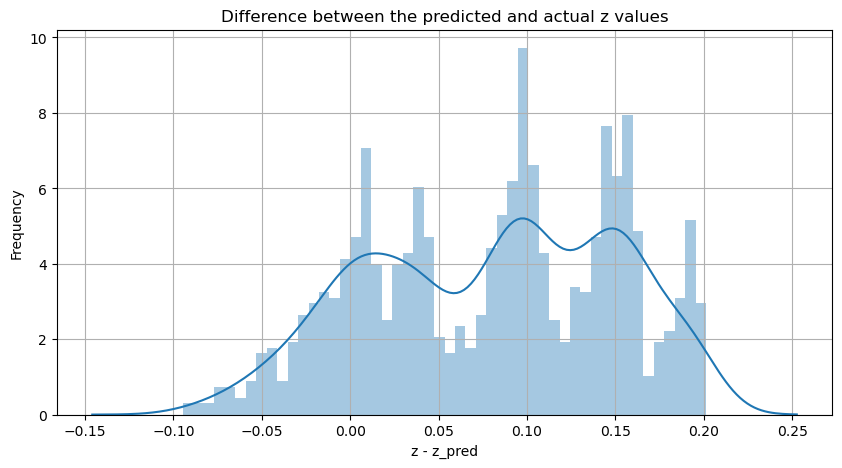

In [37]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t1['z'] - df_t1['z_pred'], bins=50)
plt.xlabel('z - z_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual z values')
plt.grid(True)
plt.show()



c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


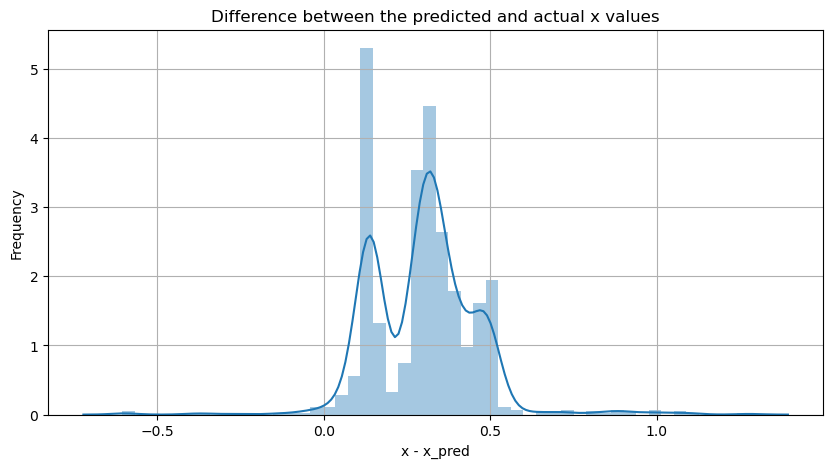

In [38]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t1['x'] - df_t1['x_pred'], bins=50)
plt.xlabel('x - x_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual x values')
plt.grid(True)
plt.show()
